In [1]:
# importing some important libraries
import os

# scipy imports
# There are several universal functions for numpy arrays that are available through the scipy package
import scipy as sc
from scipy import stats, integrate
from scipy.stats.mstats import mode

# numpy imports
# pandas depends on numpy
import numpy as np
np.set_printoptions(precision=4, threshold=500, suppress=True)

# to make this notebook's output stable across runs
np.random.seed(12345)
np.random.seed(sum(map(ord, "distributions")))

# pandas imports
# The convention is to import pandas package with a pd prefix. 
# Also, since we most commonly use Series and DataFrame classes from this package, 
# we import them into the current namespace, so we do not have to refer to them with the pd prefix.
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_columns', None) # enables showing all columns
pd.options.display.max_rows = 100
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.notebook_repr_html = True
np.set_printoptions(precision=4, suppress=True)

# matplotlib imports
import matplotlib
import matplotlib.pyplot as plt
# To plot pretty figures
#plt.rc('figure', figsize=(10, 6))
#plt.subplots(figsize=(10,6))
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

# seaborn imports
import seaborn as sns
sns.set(color_codes=True)

# bokeh imports
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once') #enable if needed to see the warning the first time.



In [2]:
# reading data to a dataframe
data=pd.read_csv('/Users/sanabahari/Desktop/Advanced-DM-Proj/weatherAUS-2.csv')

In [3]:
# shape of data
data.shape

(142193, 24)

In [4]:
data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [6]:
data.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [7]:
No_percent=(110316/(110316+31877))*100
Yes_percent=(31877/(110316+31877))*100

In [8]:
Yes_percent

22.418121848473554

In [9]:
No_percent

77.58187815152645

In [10]:
# because dataset is very large, we randomly select 1000 of the observation

df=data.sample(n=15000,random_state=123)

In [11]:
df.shape

(15000, 24)

In [12]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
111292,2015-09-07,Witchcliffe,4.0,18.8,0.0,NaN,NaN,W,24.0,NNE,W,7.0,13.0,66.0,59.0,1030.2,1026.4,NaN,NaN,14.5,17.8,No,0.0,No
131908,2014-10-12,Launceston,8.5,17.5,0.0,NaN,NaN,NNW,39.0,NNW,NW,9.0,22.0,83.0,77.0,NaN,NaN,8.0,8.0,13.3,15.0,No,0.0,No
32292,2016-01-01,Sydney,17.9,25.6,0.0,11.0,12.3,E,35.0,SSW,E,2.0,28.0,57.0,52.0,1016.4,1013.7,6.0,4.0,22.9,24.2,No,0.0,No
17608,2017-03-27,Newcastle,18.0,29.0,0.0,NaN,NaN,NaN,NaN,NE,NaN,9.0,NaN,80.0,NaN,NaN,NaN,0.0,NaN,23.0,NaN,No,0.0,No
123407,2016-04-01,SalmonGums,12.6,23.1,0.0,NaN,NaN,SSW,33.0,WNW,S,13.0,19.0,86.0,60.0,NaN,NaN,NaN,NaN,17.5,22.1,No,0.0,No


In [13]:
# resetting the index of dataset
df.reset_index(drop=True,inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
Date             15000 non-null object
Location         15000 non-null object
MinTemp          14923 non-null float64
MaxTemp          14967 non-null float64
Rainfall         14878 non-null float64
Evaporation      8631 non-null float64
Sunshine         7889 non-null float64
WindGustDir      14022 non-null object
WindGustSpeed    14029 non-null float64
WindDir9am       13968 non-null object
WindDir3pm       14581 non-null object
WindSpeed9am     14859 non-null float64
WindSpeed3pm     14707 non-null float64
Humidity9am      14804 non-null float64
Humidity3pm      14604 non-null float64
Pressure9am      13477 non-null float64
Pressure3pm      13486 non-null float64
Cloud9am         9448 non-null float64
Cloud3pm         9065 non-null float64
Temp9am          14890 non-null float64
Temp3pm          14701 non-null float64
RainToday        14878 non-null object
RISK_MM          1500

In [15]:
#checking null values of dataset
df.isnull().sum()

Date                0
Location            0
MinTemp            77
MaxTemp            33
Rainfall          122
Evaporation      6369
Sunshine         7111
WindGustDir       978
WindGustSpeed     971
WindDir9am       1032
WindDir3pm        419
WindSpeed9am      141
WindSpeed3pm      293
Humidity9am       196
Humidity3pm       396
Pressure9am      1523
Pressure3pm      1514
Cloud9am         5552
Cloud3pm         5935
Temp9am           110
Temp3pm           299
RainToday         122
RISK_MM             0
RainTomorrow        0
dtype: int64

In [16]:
#filling the missing values with 'backfill' method
df.fillna(method='backfill',inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
Date             15000 non-null object
Location         15000 non-null object
MinTemp          15000 non-null float64
MaxTemp          15000 non-null float64
Rainfall         15000 non-null float64
Evaporation      15000 non-null float64
Sunshine         15000 non-null float64
WindGustDir      15000 non-null object
WindGustSpeed    15000 non-null float64
WindDir9am       15000 non-null object
WindDir3pm       15000 non-null object
WindSpeed9am     15000 non-null float64
WindSpeed3pm     15000 non-null float64
Humidity9am      15000 non-null float64
Humidity3pm      15000 non-null float64
Pressure9am      15000 non-null float64
Pressure3pm      15000 non-null float64
Cloud9am         15000 non-null float64
Cloud3pm         15000 non-null float64
Temp9am          15000 non-null float64
Temp3pm          15000 non-null float64
RainToday        15000 non-null object
RISK_MM          

In [18]:
#converting 'Date' column to datetime format
df['Date']=pd.to_datetime(df['Date'],format='%Y/%m/%d')

In [19]:
df.Date.dtypes

dtype('<M8[ns]')

In [20]:
#convert all the letters to lower case
df.columns=df.columns.str.lower()

In [21]:
df.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,risk_mm,raintomorrow
0,2015-09-07,Witchcliffe,4.0,18.8,0.0,11.0,12.3,W,24.0,NNE,W,7.0,13.0,66.0,59.0,1030.2,1026.4,8.0,8.0,14.5,17.8,No,0.0,No
1,2014-10-12,Launceston,8.5,17.5,0.0,11.0,12.3,NNW,39.0,NNW,NW,9.0,22.0,83.0,77.0,1016.4,1013.7,8.0,8.0,13.3,15.0,No,0.0,No
2,2016-01-01,Sydney,17.9,25.6,0.0,11.0,12.3,E,35.0,SSW,E,2.0,28.0,57.0,52.0,1016.4,1013.7,6.0,4.0,22.9,24.2,No,0.0,No
3,2017-03-27,Newcastle,18.0,29.0,0.0,8.4,7.3,SSW,33.0,NE,S,9.0,19.0,80.0,60.0,1030.3,1029.0,0.0,6.0,23.0,22.1,No,0.0,No
4,2016-04-01,SalmonGums,12.6,23.1,0.0,8.4,7.3,SSW,33.0,WNW,S,13.0,19.0,86.0,60.0,1030.3,1029.0,7.0,6.0,17.5,22.1,No,0.0,No


In [22]:
df.location.unique()

array(['Witchcliffe', 'Launceston', 'Sydney', 'Newcastle', 'SalmonGums',
       'PearceRAAF', 'AliceSprings', 'MountGambier', 'GoldCoast',
       'Penrith', 'MountGinini', 'Wollongong', 'Cairns', 'Perth',
       'Darwin', 'Cobar', 'Dartmoor', 'Richmond', 'MelbourneAirport',
       'Tuggeranong', 'SydneyAirport', 'Nhil', 'Watsonia', 'WaggaWagga',
       'Nuriootpa', 'CoffsHarbour', 'Portland', 'Albany', 'Moree',
       'NorahHead', 'Adelaide', 'Uluru', 'NorfolkIsland', 'Melbourne',
       'Townsville', 'Ballarat', 'Hobart', 'Bendigo', 'Brisbane',
       'Mildura', 'Katherine', 'Albury', 'BadgerysCreek', 'Williamtown',
       'Canberra', 'PerthAirport', 'Walpole', 'Sale', 'Woomera'],
      dtype=object)

In [23]:
# We drop the location , risk_mm and "date" column because location is not important, and risk_mm is created to make target value
# so it can impact our prediction models. We also dont need "date" because we dont want to do Time Series analysis
df.drop(columns=['location','risk_mm','date'],axis=1,inplace=True)

In [24]:
#check the dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
mintemp          15000 non-null float64
maxtemp          15000 non-null float64
rainfall         15000 non-null float64
evaporation      15000 non-null float64
sunshine         15000 non-null float64
windgustdir      15000 non-null object
windgustspeed    15000 non-null float64
winddir9am       15000 non-null object
winddir3pm       15000 non-null object
windspeed9am     15000 non-null float64
windspeed3pm     15000 non-null float64
humidity9am      15000 non-null float64
humidity3pm      15000 non-null float64
pressure9am      15000 non-null float64
pressure3pm      15000 non-null float64
cloud9am         15000 non-null float64
cloud3pm         15000 non-null float64
temp9am          15000 non-null float64
temp3pm          15000 non-null float64
raintoday        15000 non-null object
raintomorrow     15000 non-null object
dtypes: float64(16), object(5)
memory usage: 2.4+ MB


In [25]:
#checking unique values for "windgustdir"
df.windgustdir.unique()

array(['W', 'NNW', 'E', 'SSW', 'NE', 'NNE', 'WSW', 'S', 'SE', 'NW', 'N',
       'SW', 'ESE', 'ENE', 'WNW', 'SSE'], dtype=object)

In [26]:
#checking unique values for "winddir9am"
df.winddir9am.unique()

array(['NNE', 'NNW', 'SSW', 'NE', 'WNW', 'E', 'SSE', 'NW', 'SW', 'S', 'W',
       'ENE', 'WSW', 'N', 'ESE', 'SE'], dtype=object)

In [27]:
#checking unique values for "winddir3pm"
df.winddir3pm.unique()

array(['W', 'NW', 'E', 'S', 'ESE', 'NE', 'NNE', 'WNW', 'SSE', 'N', 'WSW',
       'SW', 'SE', 'SSW', 'NNW', 'ENE'], dtype=object)

In [28]:
# converting Yes or No values
df.raintomorrow.replace({'No':0, 'Yes':1}, inplace=True)
df.raintoday.replace({'No':0, 'Yes':1}, inplace=True)

In [29]:
df.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000
mean,12.158453,23.142600,2.331240,5.406727,7.615013,39.903533,14.010133,18.511600,68.997467,51.629000,1017.783293,1015.395440,4.442733,4.51120,16.918507,21.614427,0.223133,0.225400
std,6.333284,7.034129,8.348742,4.129609,3.772206,13.477629,8.923146,8.754689,19.110226,20.775717,7.089345,7.011238,2.870854,2.69772,6.433177,6.845640,0.416361,0.417859
min,-8.200000,-3.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,985.100000,981.400000,0.000000,0.00000,-6.200000,-3.900000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.100000,1010.600000,1.000000,2.00000,12.300000,16.600000,0.000000,0.000000
50%,11.900000,22.600000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.750000,1015.400000,5.000000,5.00000,16.600000,21.100000,0.000000,0.000000
75%,16.800000,28.200000,0.800000,7.200000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.500000,1020.200000,7.000000,7.00000,21.500000,26.300000,0.000000,0.000000
max,29.000000,47.000000,192.000000,77.300000,14.500000,113.000000,130.000000,78.000000,100.000000,100.000000,1041.000000,1037.300000,8.000000,8.00000,37.500000,45.300000,1.000000,1.000000


In [30]:
#making corrolation matrix 
a=df.corr()

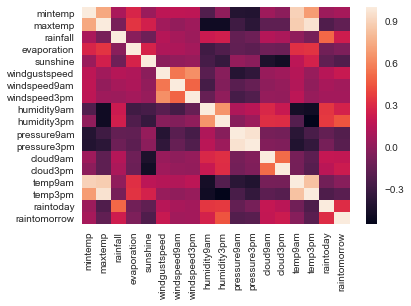

In [31]:
sns.heatmap(a, 
            xticklabels=a.columns.values,
            yticklabels=a.columns.values)

In [32]:
#specifying high corrolation
b=a.where(a>0.8)

In [33]:
# (mintemp,temp9am),(maxtemp,temp9am,temp3pm),(pressure9am,pressure3pm,),(temp9am,mintemp,maxtemp,temp3pm)
#(temp3pm,temp9am)
# these columns are highly corrolated so we drop them

In [34]:
print(b)

                mintemp   maxtemp  rainfall  evaporation  sunshine  \
mintemp        1.000000       NaN       NaN          NaN       NaN   
maxtemp             NaN  1.000000       NaN          NaN       NaN   
rainfall            NaN       NaN       1.0          NaN       NaN   
evaporation         NaN       NaN       NaN          1.0       NaN   
sunshine            NaN       NaN       NaN          NaN       1.0   
windgustspeed       NaN       NaN       NaN          NaN       NaN   
windspeed9am        NaN       NaN       NaN          NaN       NaN   
windspeed3pm        NaN       NaN       NaN          NaN       NaN   
humidity9am         NaN       NaN       NaN          NaN       NaN   
humidity3pm         NaN       NaN       NaN          NaN       NaN   
pressure9am         NaN       NaN       NaN          NaN       NaN   
pressure3pm         NaN       NaN       NaN          NaN       NaN   
cloud9am            NaN       NaN       NaN          NaN       NaN   
cloud3pm            

In [35]:
# temp9am,pressure9am
#  are highly corrolated so we drop them

In [36]:
df.drop(columns=['temp9am','pressure9am'],inplace=True)

In [37]:
#selection only numerical variables, except target variablze
df_target=df[['raintomorrow']]
df_numeric=df[['mintemp','maxtemp','rainfall','evaporation','sunshine','windgustspeed',
              'windspeed9am','windspeed3pm','humidity9am','humidity3pm','pressure3pm',
              'cloud9am','cloud3pm','temp3pm','raintoday']]

In [38]:
# selection categorical variables
df_cat=df[['windgustdir','winddir9am','winddir3pm']]


In [39]:
# data frame before creating dummies:
df_not_dummies=pd.concat([df_numeric,df_cat],axis=1)
df_not_dummies.shape


(15000, 18)

In [40]:
df.head()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure3pm,cloud9am,cloud3pm,temp3pm,raintoday,raintomorrow
0,4.0,18.8,0.0,11.0,12.3,W,24.0,NNE,W,7.0,13.0,66.0,59.0,1026.4,8.0,8.0,17.8,0,0
1,8.5,17.5,0.0,11.0,12.3,NNW,39.0,NNW,NW,9.0,22.0,83.0,77.0,1013.7,8.0,8.0,15.0,0,0
2,17.9,25.6,0.0,11.0,12.3,E,35.0,SSW,E,2.0,28.0,57.0,52.0,1013.7,6.0,4.0,24.2,0,0
3,18.0,29.0,0.0,8.4,7.3,SSW,33.0,NE,S,9.0,19.0,80.0,60.0,1029.0,0.0,6.0,22.1,0,0
4,12.6,23.1,0.0,8.4,7.3,SSW,33.0,WNW,S,13.0,19.0,86.0,60.0,1029.0,7.0,6.0,22.1,0,0


In [41]:
#making dummy variables for categorical variables
df=pd.get_dummies(df,drop_first=True)

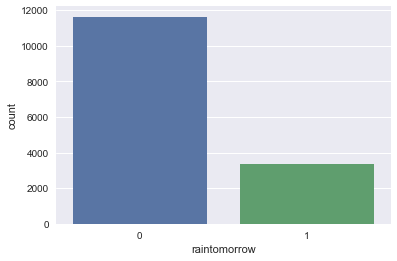

In [42]:
# visualizing rain vs no rain
sns.set(style="darkgrid")
ax = sns.countplot(x="raintomorrow", data=df)

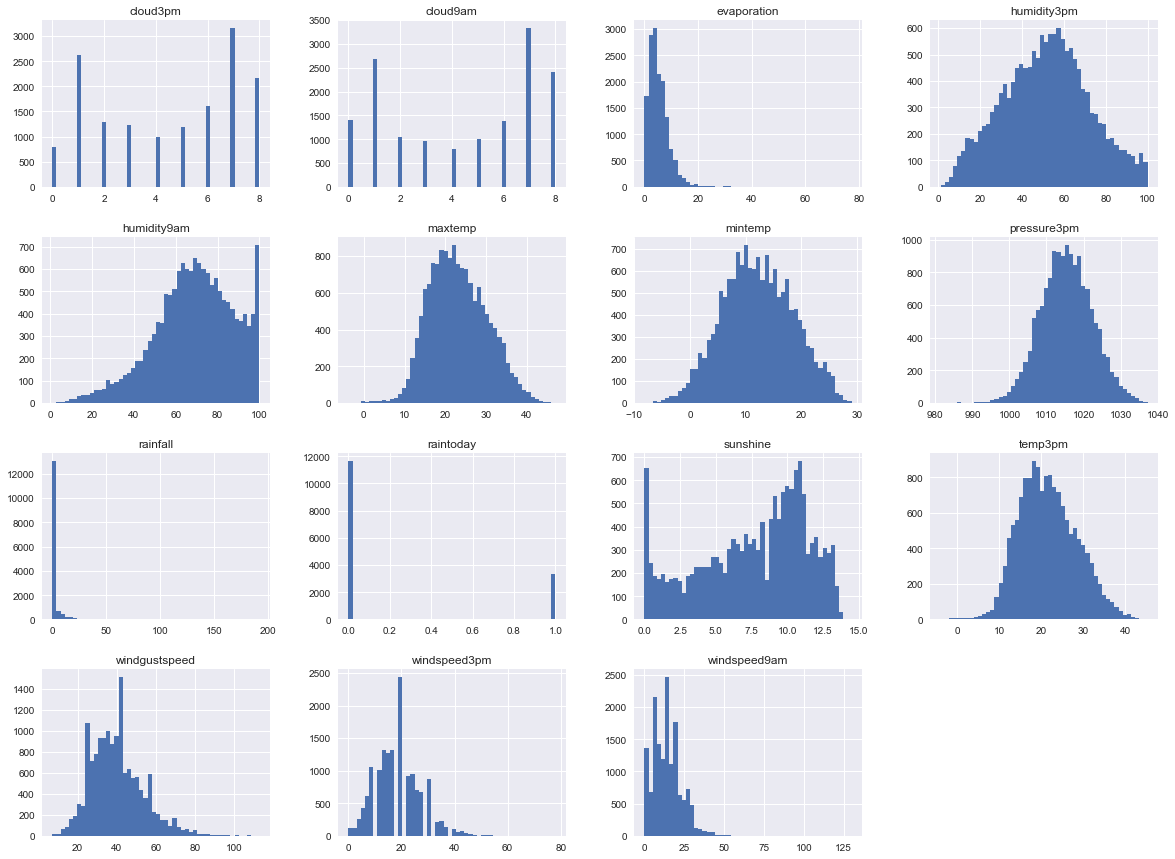

In [43]:
# creating histograms for variables
%matplotlib inline
import matplotlib.pyplot as plt
df_numeric.hist(bins=50, figsize=(20,15))
plt.show()

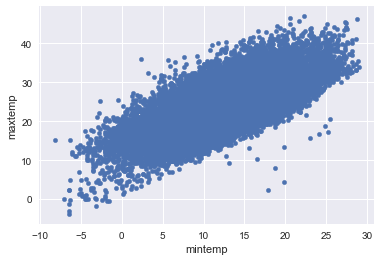

In [44]:
#scatter plot
df.plot(kind="scatter", x="mintemp", y="maxtemp")

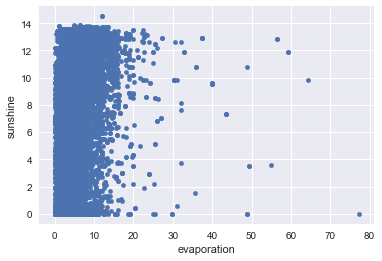

In [45]:
df.plot(kind="scatter", x="evaporation", y="sunshine")

In [46]:
#Now we have to scale our data:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

In [47]:
df.head()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure3pm,cloud9am,cloud3pm,temp3pm,raintoday,raintomorrow,windgustdir_ENE,windgustdir_ESE,windgustdir_N,windgustdir_NE,windgustdir_NNE,windgustdir_NNW,windgustdir_NW,windgustdir_S,windgustdir_SE,windgustdir_SSE,windgustdir_SSW,windgustdir_SW,windgustdir_W,windgustdir_WNW,windgustdir_WSW,winddir9am_ENE,winddir9am_ESE,winddir9am_N,winddir9am_NE,winddir9am_NNE,winddir9am_NNW,winddir9am_NW,winddir9am_S,winddir9am_SE,winddir9am_SSE,winddir9am_SSW,winddir9am_SW,winddir9am_W,winddir9am_WNW,winddir9am_WSW,winddir3pm_ENE,winddir3pm_ESE,winddir3pm_N,winddir3pm_NE,winddir3pm_NNE,winddir3pm_NNW,winddir3pm_NW,winddir3pm_S,winddir3pm_SE,winddir3pm_SSE,winddir3pm_SSW,winddir3pm_SW,winddir3pm_W,winddir3pm_WNW,winddir3pm_WSW
0,0.327957,0.444882,0.0,0.142303,0.848276,0.160377,0.053846,0.166667,0.656566,0.585859,0.805009,1.000,1.00,0.441057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.448925,0.419291,0.0,0.142303,0.848276,0.301887,0.069231,0.282051,0.828283,0.767677,0.577818,1.000,1.00,0.384146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.701613,0.578740,0.0,0.142303,0.848276,0.264151,0.015385,0.358974,0.565657,0.515152,0.577818,0.750,0.50,0.571138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.704301,0.645669,0.0,0.108668,0.503448,0.245283,0.069231,0.243590,0.797980,0.595960,0.851521,0.000,0.75,0.528455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.559140,0.529528,0.0,0.108668,0.503448,0.245283,0.100000,0.243590,0.858586,0.595960,0.851521,0.875,0.75,0.528455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df.raintomorrow.unique()

array([0., 1.])

In [49]:
# converting type of 'raintomorrow' to 'int64'
df.raintomorrow=df.raintomorrow.astype('int64')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 61 columns):
mintemp            15000 non-null float64
maxtemp            15000 non-null float64
rainfall           15000 non-null float64
evaporation        15000 non-null float64
sunshine           15000 non-null float64
windgustspeed      15000 non-null float64
windspeed9am       15000 non-null float64
windspeed3pm       15000 non-null float64
humidity9am        15000 non-null float64
humidity3pm        15000 non-null float64
pressure3pm        15000 non-null float64
cloud9am           15000 non-null float64
cloud3pm           15000 non-null float64
temp3pm            15000 non-null float64
raintoday          15000 non-null float64
raintomorrow       15000 non-null int64
windgustdir_ENE    15000 non-null float64
windgustdir_ESE    15000 non-null float64
windgustdir_N      15000 non-null float64
windgustdir_NE     15000 non-null float64
windgustdir_NNE    15000 non-null float64
windgustdir

In [51]:
df.describe

<bound method NDFrame.describe of         mintemp   maxtemp  rainfall  evaporation  sunshine  windgustspeed  \
0      0.327957  0.444882  0.000000     0.142303  0.848276       0.160377   
1      0.448925  0.419291  0.000000     0.142303  0.848276       0.301887   
2      0.701613  0.578740  0.000000     0.142303  0.848276       0.264151   
3      0.704301  0.645669  0.000000     0.108668  0.503448       0.245283   
4      0.559140  0.529528  0.000000     0.108668  0.503448       0.245283   
5      0.338710  0.340551  0.000000     0.108668  0.503448       0.216981   
6      0.766129  0.830709  0.018750     0.108668  0.448276       0.301887   
7      0.577957  0.511811  0.000000     0.056921  0.600000       0.386792   
8      0.868280  0.690945  0.056250     0.111255  0.779310       0.283019   
9      0.384409  0.444882  0.000000     0.111255  0.779310       0.198113   
10     0.561828  0.291339  0.000000     0.111255  0.779310       0.367925   
11     0.561828  0.675197  0.000000     0.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [53]:
df.raintomorrow.value_counts()

0    11619
1     3381
Name: raintomorrow, dtype: int64

In [54]:
# seperating target variable and predictors
X=df[[i for i in list(df.columns) if i != 'raintomorrow']]
y=df[['raintomorrow']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [74]:
# Create the hyperparameter grid for knn model
n_nei = np.arange(2,12,1)
param_grid_knn = {'n_neighbors': n_nei}

In [75]:
knn=KNeighborsClassifier()

In [76]:
#building the gridsearch with 10-fold cv
knn_cv=GridSearchCV(knn,param_grid_knn,cv=10)

In [77]:
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
# Print the optimal parameters and best score
print("Tuned knn Parameter: {}".format(knn_cv.best_params_))

Tuned knn Parameter: {'n_neighbors': 8}


In [79]:
y_pred_knn_tuned=knn_cv.predict(X_test)

In [80]:
print(confusion_matrix(y_test, y_pred_knn_tuned))
print(classification_report(y_test, y_pred_knn_tuned))
print(accuracy_score(y_test,y_pred_knn_tuned))

[[2253   71]
 [ 582   94]]
             precision    recall  f1-score   support

          0       0.79      0.97      0.87      2324
          1       0.57      0.14      0.22       676

avg / total       0.74      0.78      0.73      3000

0.7823333333333333


In [81]:
#changing the thereshold for classifier
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

In [82]:
y_pred_prob_knn = knn_cv.predict_proba(X_test)[:,1]

In [83]:
y_pred_adj=adjusted_classes(y_pred_prob_knn,0.3)

In [84]:
print(confusion_matrix(y_test, y_pred_adj))
print(classification_report(y_test, y_pred_adj))
print(accuracy_score(y_test,y_pred_adj))


[[1951  373]
 [ 359  317]]
             precision    recall  f1-score   support

          0       0.84      0.84      0.84      2324
          1       0.46      0.47      0.46       676

avg / total       0.76      0.76      0.76      3000

0.756


In [ ]:
# you can see above by changing threshold we improve recall, but precision goes down

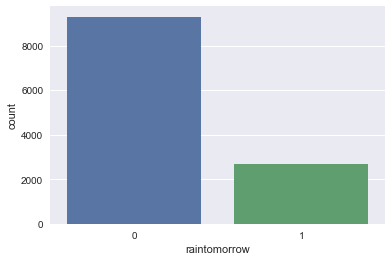

In [85]:
# checking the distribution of target value in train dataset
sns.set(style="darkgrid")
ax = sns.countplot(x="raintomorrow", data=y_train)

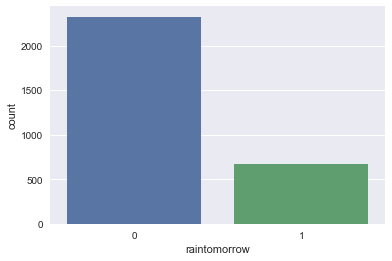

In [86]:
# checking the distribution of target value in test dataset
ax = sns.countplot(x="raintomorrow", data=y_test)

In [87]:
#our data is inbalanced, we have to balance it with upsampling


In [88]:
df.raintomorrow.value_counts()

0    11619
1     3381
Name: raintomorrow, dtype: int64

In [89]:
y_train.raintomorrow.value_counts()

0    9295
1    2705
Name: raintomorrow, dtype: int64

In [90]:
from sklearn.utils import resample

In [91]:
# Separate majority and minority classes
df_majority = y_train[y_train.raintomorrow==0]
df_minority = y_train[y_train.raintomorrow==1]

In [108]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=6000,    # to match majority class
                                 random_state=42) # reproducible results

In [109]:
df_majority=df_majority.sample(n=6000,random_state=123)

In [110]:
y_train_balanced = pd.concat([df_majority, df_minority_upsampled])

In [112]:
y_train_balanced.reset_index()

,index,raintomorrow
0,5559,0
1,4689,0
2,11147,0
3,5357,0
4,5598,0
5,7892,0
6,3036,0
7,5198,0
8,11541,0
9,577,0


In [113]:
# Display new class counts
y_train_balanced.raintomorrow.value_counts()

1    6000
0    6000
Name: raintomorrow, dtype: int64

In [114]:
# We train knn model on a balance data for a knn model:
knn_balaced=knn_cv.fit(X_train,y_train_balanced)


In [115]:
y_pred_knn_b=knn_balaced.predict(X_test)

In [116]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_knn_b))
print(classification_report(y_test, y_pred_knn_b))
print(accuracy_score(y_test,y_pred_knn_b))

[[1117 1207]
 [ 342  334]]
             precision    recall  f1-score   support

          0       0.77      0.48      0.59      2324
          1       0.22      0.49      0.30       676

avg / total       0.64      0.48      0.53      3000

0.4836666666666667


In [ ]:
# we see by balancing our train dataset, precision goes down, recall is improved by 2 percent, and f1 goes down
#also accuracy is decresed. So balncing train dataset does not help.

In [117]:
# now we are going to apply a tunned logistic regression
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid_log = {'C': c_space, 'penalty': ['l1', 'l2']}

In [118]:
# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

In [119]:
# Instantiate the GridSearchCV object with 10 fold cv: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid_log, cv=10)

In [120]:
# Fit it to the training data
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [121]:
y_pred_log=logreg_cv.predict(X_test)

In [122]:
# Print the optimal parameters 
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))

Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l1'}


In [123]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print(accuracy_score(y_test,y_pred_log))

[[2194  130]
 [ 348  328]]
             precision    recall  f1-score   support

          0       0.86      0.94      0.90      2324
          1       0.72      0.49      0.58       676

avg / total       0.83      0.84      0.83      3000

0.8406666666666667


In [ ]:
# Now we are going to perform  DecisionTreeClassifier with Random grid search to find the best hyper parameter:

In [124]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [147]:
# Setup the parameters and distributions to sample from: param_dist
param_tree = {"max_depth": [8, None],
              "max_features": np.arange(1, 15,1),
              "min_samples_leaf": np.arange(1, 15,1),
              "criterion": ["gini", "entropy"]}

In [148]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

In [149]:
# Instantiate the RandomizedSearchCV object: tree_cv with 10 fold cross validation
tree_cv = GridSearchCV(tree, param_tree, cv=10)

In [150]:
tree_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [8, None], 'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [151]:
y_pred_tree=tree_cv.predict(X_test)

In [152]:
# Print the tuned parameters 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 13, 'min_samples_leaf': 3}


In [153]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print(accuracy_score(y_test,y_pred_tree))

[[2120  204]
 [ 320  356]]
             precision    recall  f1-score   support

          0       0.87      0.91      0.89      2324
          1       0.64      0.53      0.58       676

avg / total       0.82      0.83      0.82      3000

0.8253333333333334


In [145]:
# performin SVM model

In [154]:
# Specify the hyperparameter space
parameters_scv = {'C':[1, 10, 100],
              'gamma':[0.1, 0.01]}

In [155]:
svm=SVC()

In [156]:
svm.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [157]:
# performing gridsearch for svm with 10-fold
svm_cv= GridSearchCV(svm, parameters_scv, cv=10)

In [158]:
svm_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [159]:
# Print the optimal parameters and best score
print("Tuned SVC Parameter: {}".format(svm_cv.best_params_))

Tuned SVC Parameter: {'C': 100, 'gamma': 0.01}


In [160]:
y_pred_svm=svm_cv.predict(X_test)

In [161]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))

[[2216  108]
 [ 381  295]]
             precision    recall  f1-score   support

          0       0.85      0.95      0.90      2324
          1       0.73      0.44      0.55       676

avg / total       0.83      0.84      0.82      3000

0.837


In [162]:
rf=RandomForestClassifier()

In [163]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [164]:
param_rf = {"max_depth": [4, None],
              "max_features": np.arange(1, 12),
              "max_leaf_nodes":np.arange(2,12),
              "min_samples_leaf": np.arange(1, 12)}

In [165]:
rf_cv=GridSearchCV(rf,param_rf,cv=10)

In [166]:
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, None], 'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), 'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [167]:
# Print the optimal parameters and best score
print("Tuned rf Parameter: {}".format(rf_cv.best_params_))

Tuned rf Parameter: {'max_depth': None, 'max_features': 11, 'max_leaf_nodes': 10, 'min_samples_leaf': 6}


In [168]:
y_pred_rf=rf_cv.predict(X_test)

In [169]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))

[[2287   37]
 [ 519  157]]
             precision    recall  f1-score   support

          0       0.82      0.98      0.89      2324
          1       0.81      0.23      0.36       676

avg / total       0.81      0.81      0.77      3000

0.8146666666666667


In [170]:
nb = GaussianNB()

In [171]:
scores = cross_val_score(nb, X_train, y_train, cv=10)


In [179]:
nb.fit(X_train,y_train)

GaussianNB(priors=None)

In [183]:
y_pred_nb=nb.predict(X_test)

In [184]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print(accuracy_score(y_test,y_pred_nb))

[[1820  504]
 [ 254  422]]
             precision    recall  f1-score   support

          0       0.88      0.78      0.83      2324
          1       0.46      0.62      0.53       676

avg / total       0.78      0.75      0.76      3000

0.7473333333333333
